**Task 1**


Create a function for the SEM formula.

In [1]:
import numpy as np

def SEM(Z,A):
    '''
    '''
    # Define Nuclear Mass Constants
    m_p = 938.783 #MeV/c^2
    m_n = 939.565 #MeV/c^2
    
    # Define SEM Constants
    a_v = 15.56 #MeV
    a_s = 17.23 #MeV
    a_c = 0.697 #MeV
    a_sym = 23.285 #Mev
    a_r = 12.0 #MeV
    delta = a_r*A**(-1/2)
    
    # Calculate Binding Energy
    B = [0,0,0,0,0]
    B[0] = +a_v*A
    B[1] = -a_s*A**(2/3)
    B[2] = -a_c*Z**2*A**(-1/3)
    B[3] = -a_sym*((A-2*Z)**2/A)
    if A % 2 == 0:
        if Z % 2 == 0:
            B[4] = delta
        else:
            B[4] = -delta
    BindingEnergy = sum(B)
    
    # Calculate Nuclear Mass
    ProtonMass = m_p*(Z)
    NeutronMass = m_n*(A-Z)
    NuclearMass = ProtonMass + NeutronMass - BindingEnergy

    # Calculate Binding Energy Per Nucleon
    BindingEnergyPerNucleon = BindingEnergy/A
    
    return NuclearMass, BindingEnergy, BindingEnergyPerNucleon

In [2]:
# Testing the Forumla for Carbon-12
C = SEM(6,12)
print(f"\
The Nuclear mass of Carbon is {C[0]:.3} MeV.c^-2.\n\
The Binding Energy is {C[1]:.3} MeV\n\
The Binding Energy per Nucleon is {C[2]:.3} MeV")

The Nuclear mass of Carbon is 1.12e+04 MeV.c^-2.
The Binding Energy is 88.9 MeV
The Binding Energy per Nucleon is 7.41 MeV


**Task 2**


Calculate the B/A for a selection of stable isotopes provided by 'stable.dat'.


Create a plot with A vs B/A. Use different symbols and/or colours for isotopes of different elements.

In [3]:
# Read the File.

f = open('stable.dat')
f.readline()
nuclide, A, Z, N = [], [], [], []
for line in f.readlines():
    nuclide.append(line.split()[0])
    A.append(float(line.split()[1]))
    Z.append(float(line.split()[2]))
    N.append(float(line.split()[3]))
f.close()

In [4]:
# Calculate B/A.
BEpN = [(SEM(Z[i],A[i])[2]) for i in range(len(Z))]

In [5]:
# Find Element Label for Each Isotope.
from string import digits
remove_digits = str.maketrans('', '', digits)

element = []
for isotope in nuclide:
    element.append(isotope.translate(remove_digits))

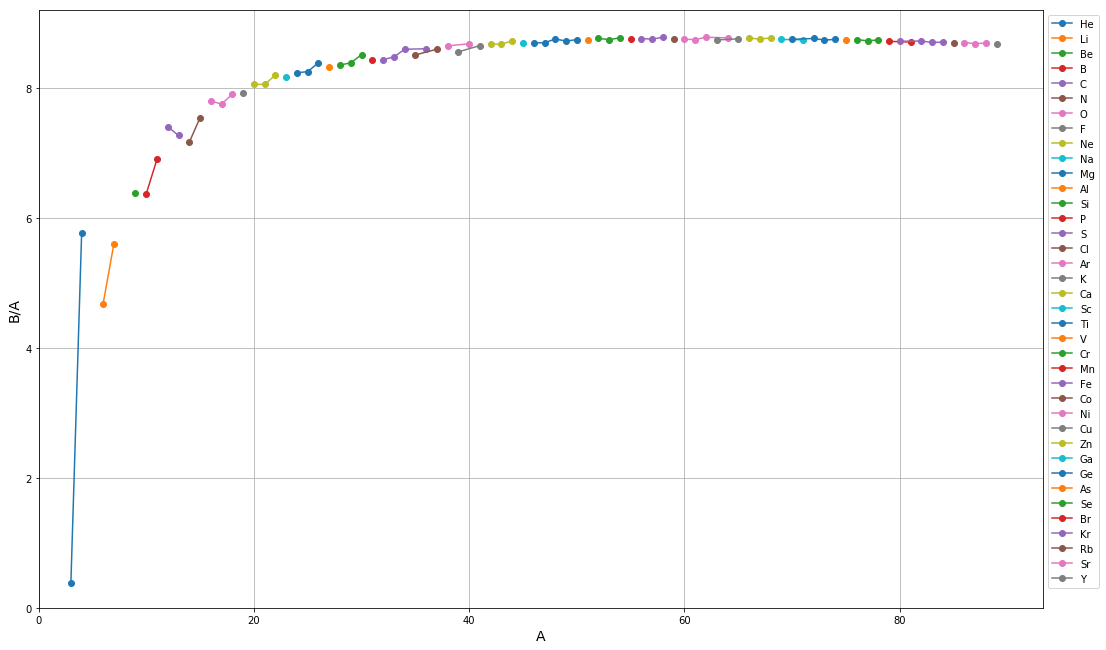

In [68]:
# Create Plot.
import matplotlib.pyplot as plt

plt.figure(figsize=(18,11))

Zmin = 2
Zmax = int(max(Z))

for z in range(Zmin,Zmax):
    plotx, ploty = [], []
    for i in range(len(Z)):
        if Z[i] == z:
            plotx.append(A[i])
            ploty.append(BEpN[i])
            elem = element[i]
    plt.plot(plotx,ploty,'o-',label=elem)

plt.xlabel('A',fontsize='14')
plt.xlim(0)
plt.ylabel('B/A',fontsize='14')
plt.ylim(0)

plt.legend(bbox_to_anchor=(1,1))
plt.grid()

plt.savefig('SEM_fig1.png', bbox_inches='tight')
plt.show()